In [1]:
## Parameters specific to where your folders are and your data
parameter_file = '../params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os
from os.path import join
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
import helper
import create_output
print('Number of tissues: ',len(tissues))

('Number of tissues: ', 13)


## Create directory

In [2]:
save_dir = "Results/histograms"

In [3]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
if not os.path.exists("Results/Figures/Figure3/Distance_to_Anno/"):
    os.makedirs("Results/Figures/Figure3/Distance_to_Anno/")

## Figure: Experimental regions compared to Refseq regions (only when eTSS is seen). 
### Tags are Merged 
### No divergent transcription plotted
do the same figure but without the negative transcription

## Experimental vs Refseq

In [4]:
## Create RefSeq peak file for this
meta_f = "../Results/output/TSS1.exp.meta"
tag_f = "../Results/merged/tags_TSS_merged"


exp_bed_f = "../Results/output/TSS1.exp.bed"
mrna_bed_f = "../Results/Figures/Figure3/A.TSS1_mrna"


('output histogram exp', 'Results/histograms/tags_merged.exp.hist')
annotatePeaks.pl ../Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d ../Results/merged/tags_TSS_merged -pc 3 > Results/histograms/tags_merged.exp.hist
('output histogram mrna', 'Results/histograms/tags_merged.mrna.hist')
annotatePeaks.pl ../Results/Figures/Figure3/A.TSS1_mrna /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d ../Results/merged/tags_TSS_merged -pc 3 > Results/histograms/tags_merged.mrna.hist
0.0230990739236192
[-38.17659833  42.41125935]
Max value: 0.0461981478472
Full-width at half-maximum: 80.5878576849 (nts)
0.0190358773077747
[-31.47149005 103.83319628]
Max value: 0.0380717546155
Full-width at half-maximum:

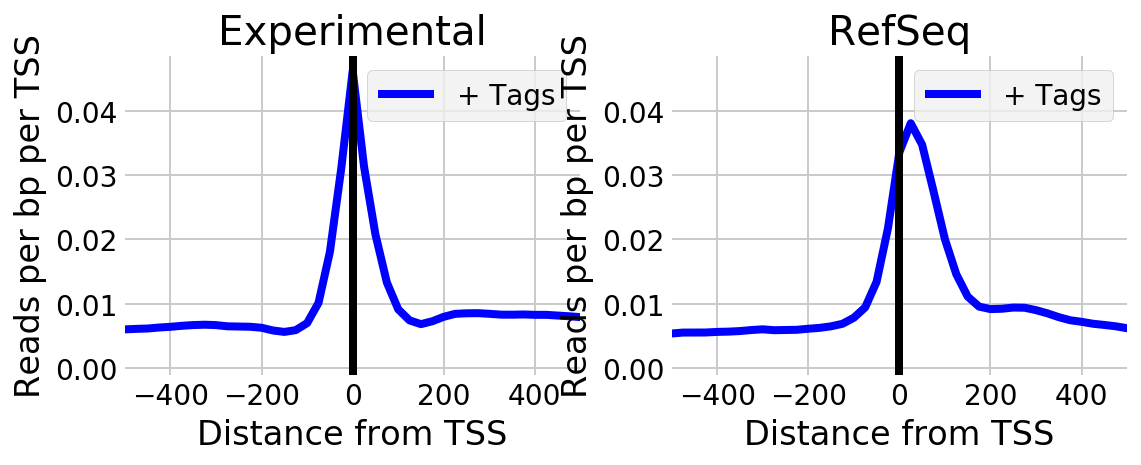

In [5]:
# Experimental 
hist_out_exp = join(save_dir,"tags_merged.exp.hist")
print('output histogram exp',hist_out_exp)
hist(tag_f,hist_out_exp,ref_fa,anno_gff,mode='peak',peak=exp_bed_f,region=4000,res=25,pc=3,
    include_norm=False, include_heat=False)
#hist_plot(hist_out_exp)


# Refseq 
hist_out_mrna = join(save_dir,"tags_merged.mrna.hist") #"Results/Figures/Figure3/A.TSS1_mrna.hist"
input_file_mrna = mrna_bed_f
print('output histogram mrna',hist_out_mrna)
hist(tag_f,hist_out_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_bed_f,region=4000,res=25,pc=3,
    include_norm=False, include_heat=False)


wrap_hist_plot([hist_out_exp ,
                hist_out_mrna ], hist_save=join(save_dir, "exp_ref_hist_tssMerge"), 
                    names=["Experimental","RefSeq"], include_negative=False)

### CHO GROCap vs CHO csRNA on experimental

annotatePeaks.pl ../Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/histograms/tags_cho_grocap.exp.hist
annotatePeaks.pl ../Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/START/f03_tags/trim_CHO_START1 -pc 3 > Results/histograms/tags_cho_csrna.exp.hist
0.1284193273765155
[-31.23506942  29.29824039]
Max value: 0.256838654753
Full-width at half-maximum: 60.5333098055 (nts)
0.1591406011369145
[-23.79774855  27.11403162]
Max value: 0.318281202274
Full-width at half-maximum: 50.911780174 (nts)


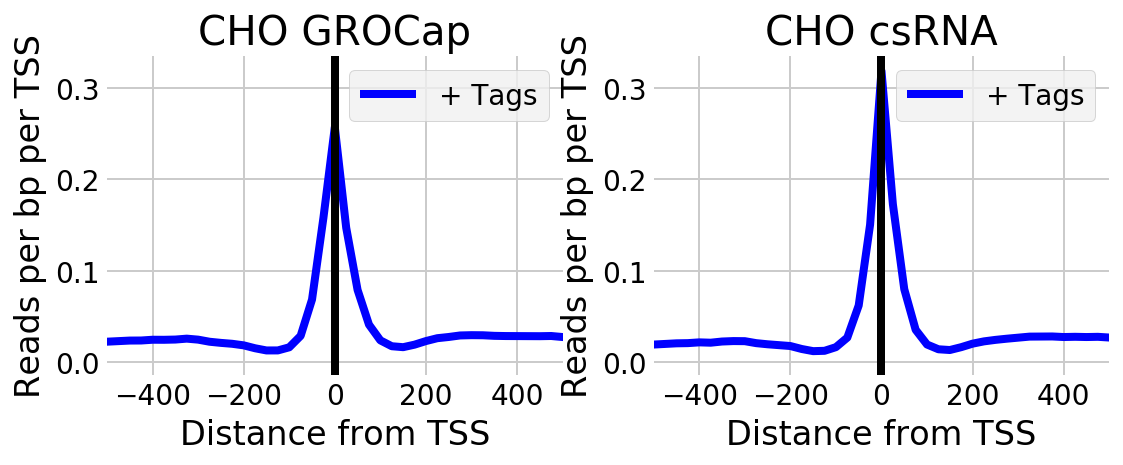

In [6]:
# GROCap 
hist_out_cho_grocap = join(save_dir,"tags_cho_grocap.exp.hist")
tissue = "CHO"
seq = "GROCap"
rep = "1"

grocap_tag_f = join(data_folder, tissue, seq, "f03_tags", "trim_" + tissue + "_" + seq + rep)
hist(grocap_tag_f,hist_out_cho_grocap,ref_fa,anno_gff,mode='peak',peak=exp_bed_f,region=4000,res=25,pc=3, 
    include_norm=False, include_heat=False)


# csRNA 

hist_out_cho_csrna = join(save_dir,"tags_cho_csrna.exp.hist")
tissue = "CHO"
seq = "START"
rep = "1"

csrna_tag_f = join(data_folder, tissue, seq, "f03_tags", "trim_" + tissue + "_" + seq + rep)
hist(csrna_tag_f,hist_out_cho_csrna,ref_fa,anno_gff,mode='peak',peak=exp_bed_f,region=4000,res=25,pc=3, 
    include_norm=False, include_heat=False)


wrap_hist_plot([hist_out_cho_grocap ,
                hist_out_cho_csrna], hist_save=join(save_dir, "exp_hist.grocap_csrna"), 
                    names=["CHO GROCap","CHO csRNA"], include_negative=False)

### CHO GROCap vs CHO csRNA on refseq

annotatePeaks.pl ../Results/Figures/Figure3/A.TSS1_mrna /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/histograms/tags_cho_grocap.mrna.hist
annotatePeaks.pl ../Results/Figures/Figure3/A.TSS1_mrna /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/START/f03_tags/trim_CHO_START1 -pc 3 > Results/histograms/tags_cho_csrna.mrna.hist
0.10877347482683802
[-17.07023122  84.04301412]
Max value: 0.217546949654
Full-width at half-maximum: 101.113245346 (nts)
0.1328986771332395
[-11.97517436  82.65495156]
Max value: 0.265797354266
Full-width at half-maximum: 94.6301259203 (nts)


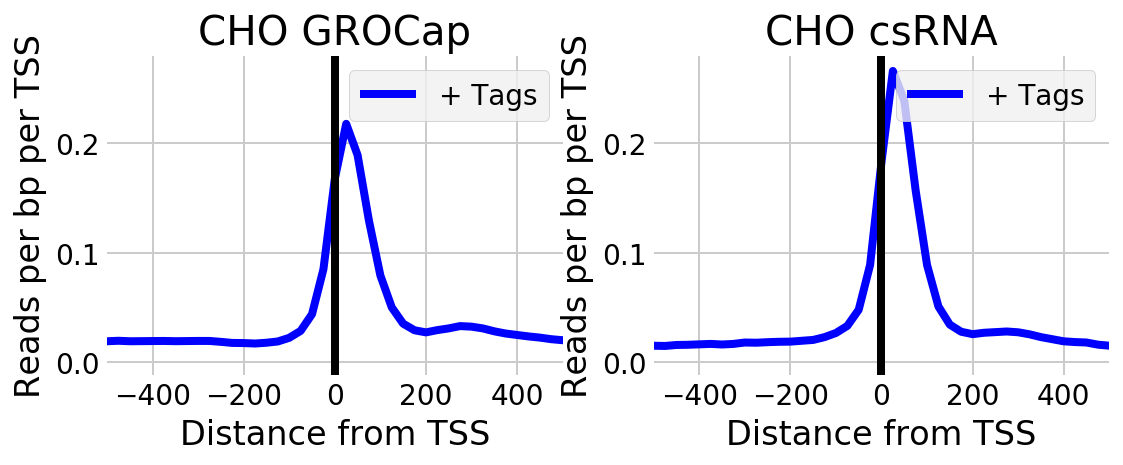

In [7]:
# GROCap 
hist_out_cho_grocap = join(save_dir,"tags_cho_grocap.mrna.hist")
tissue = "CHO"
seq = "GROCap"
rep = "1"

grocap_tag_f = join(data_folder, tissue, seq, "f03_tags", "trim_" + tissue + "_" + seq + rep)
hist(grocap_tag_f,hist_out_cho_grocap,ref_fa,anno_gff,mode='peak',peak=mrna_bed_f,region=4000,res=25,pc=3,
     include_norm=False, include_heat=False)


# csRNA 

hist_out_cho_csrna = join(save_dir,"tags_cho_csrna.mrna.hist")
tissue = "CHO"
seq = "START"
rep = "1"

csrna_tag_f = join(data_folder, tissue, seq, "f03_tags", "trim_" + tissue + "_" + seq + rep)
hist(csrna_tag_f,hist_out_cho_csrna,ref_fa,anno_gff,mode='peak',peak=mrna_bed_f,region=4000,res=25,pc=3,
     include_norm=False, include_heat=False)

wrap_hist_plot([hist_out_cho_grocap ,
                hist_out_cho_csrna], hist_save=join(save_dir, "mrna_hist.grocap_csrna"), 
                    names=["CHO GROCap","CHO csRNA"], include_negative=False)

### Brain GROCap vs Brain csRNA on experimental

annotatePeaks.pl ../Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/GROCap/f03_tags/trim_Brain_GROCap1 -pc 3 > Results/histograms/tags_brain_grocap.exp.hist
annotatePeaks.pl ../Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/Brain/START/f03_tags/trim_Brain_START1 -pc 3 > Results/histograms/tags_brain_csrna.exp.hist
0.152996750609261
[-26.0702371   24.14288637]
Max value: 0.305993501219
Full-width at half-maximum: 50.2131234722 (nts)
0.070602307067682
[-28.58913408  28.57985432]
Max value: 0.141204614135
Full-width at half-maximum: 57.1689884019 (nts)


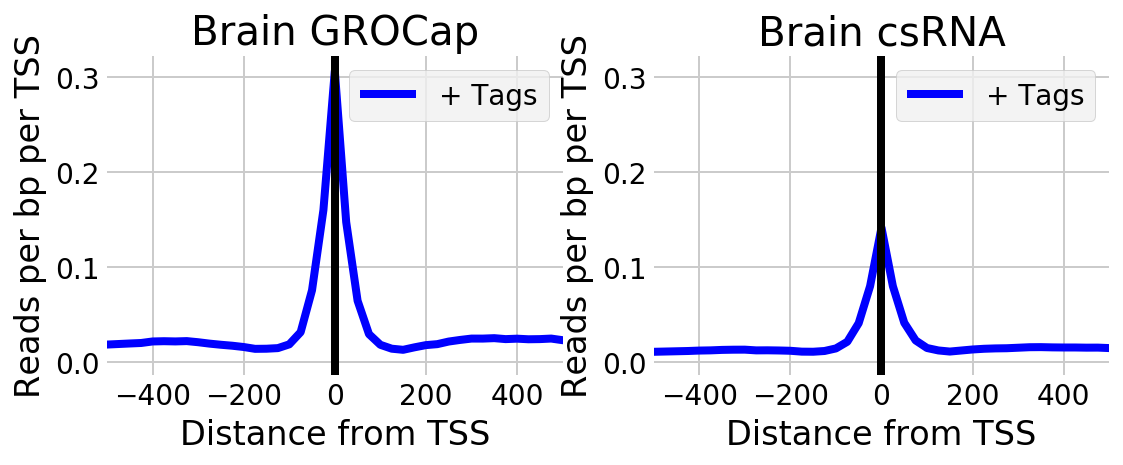

In [8]:
# GROCap 
hist_out_brain_grocap = join(save_dir,"tags_brain_grocap.exp.hist")
tissue = "Brain"
seq = "GROCap"
rep = "1"

grocap_tag_f = join(data_folder, tissue, seq, "f03_tags", "trim_" + tissue + "_" + seq + rep)
hist(grocap_tag_f,hist_out_brain_grocap,ref_fa,anno_gff,mode='peak',peak=exp_bed_f,region=4000,res=25,pc=3, 
    include_norm=False, include_heat=False)


# csRNA 

hist_out_brain_csrna = join(save_dir,"tags_brain_csrna.exp.hist")
tissue = "Brain"
seq = "START"
rep = "1"

csrna_tag_f = join(data_folder, tissue, seq, "f03_tags", "trim_" + tissue + "_" + seq + rep)
hist(csrna_tag_f,hist_out_brain_csrna,ref_fa,anno_gff,mode='peak',peak=exp_bed_f,region=4000,res=25,pc=3, 
    include_norm=False, include_heat=False)


wrap_hist_plot([hist_out_brain_grocap ,
                hist_out_brain_csrna], hist_save=join(save_dir, "exp_hist.grocap_csrna"), 
                    names=["Brain GROCap","Brain csRNA"], include_negative=False)